# FINAL TASK OF PRODIGY INFOTECH

Importing the Input data

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.12G/2.13G [00:19<00:00, 112MB/s]
100% 2.13G/2.13G [00:19<00:00, 115MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile("leapgestrecog.zip") as zip_ref:
  zip_ref.extractall()

Importing the dependencies

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt # for plotting
import os
import cv2
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

Label the dataset

In [ ]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = "/content/leapGestRecog"

In [ ]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[6, 5, 5, ..., 4, 4, 4],
        [5, 5, 5, ..., 5, 5, 3],
        [5, 6, 6, ..., 5, 5, 4],
        ...,
        [6, 4, 5, ..., 4, 5, 4],
        [3, 5, 4, ..., 3, 4, 3],
        [4, 4, 5, ..., 4, 5, 5]], dtype=uint8),
 0]

In [ ]:
import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [ ]:
label[:10]


[3, 8, 3, 3, 1, 0, 0, 1, 9, 7]

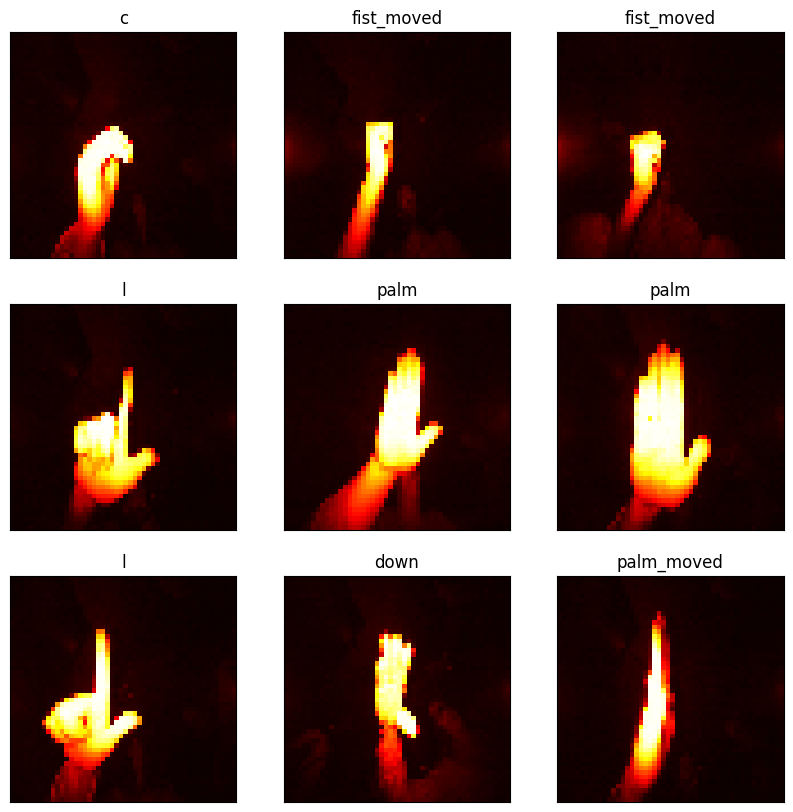

In [ ]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()


In [ ]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [ ]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)



Training and Testing the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 9s 10ms/step - loss: 0.3749 - accuracy: 0.8769 - val_loss: 0.0099 - val_accuracy: 0.9975
Epoch 2/7
438/438 [==============================] - 3s 8ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 3/7
438/438 [==============================] - 4s 9ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0042 - val_accuracy: 0.9985
Epoch 4/7
438/438 [==============================] - 3s 8ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 5/7
438/438 [==============================] - 3s 8ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9997
Epoch 6/7
438/438 [==============================] - 5s 10ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 7/7
438/438 [==============================] - 4s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0022 - val_accuracy: 0.9998


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

Finding Accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9998
Test accuracy: 99.98%


188/188 [==============================] - 1s 2ms/step


[]

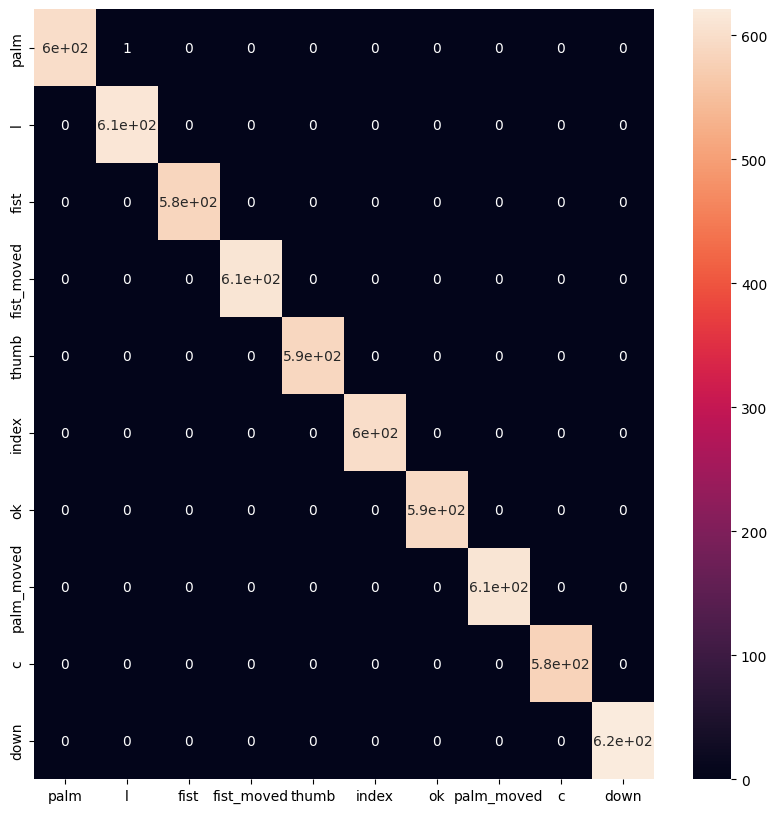

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

The Accuracy rate of the configured model is 99.9% and This is made after training the model with lots of data and resource using ML libraries